In [1]:
import pandas as pd 

from porise.model.algorithms.cmab import FTRL_LR
from porise.envs.real.real_env import RealEnv
from porise import Simulator

In [2]:
df = pd.read_csv('../porise/data/exp5217_all_imp100_scaled_train_new.csv')
print("cdna user features loaded")
df = df.set_index('easy_id')
user_map = df.T.to_dict('list')
print('get user map ready')

cdna user features loaded
get user map ready


In [3]:
env = RealEnv(rat_log_path='../porise/data/reward_nov02_nov30_exp5217.csv', user_vectors_map=user_map)

In [4]:
print(len(env.get_user_state()[0]))

159


In [5]:
model = FTRL_LR(
    n_arms=env.action_space.n,
    arm_feat_dim=len(env.get_user_state()[1][0]),
    user_feat_dim=len(env.get_user_state()[0]),
    return_list=False,
    memory_size=int(1e4),
    use_cuda=False,
    prio_a=0.6,
    prio_beta=0.4,
    prio_e=0.001,
    beta_increment_per_sampling=0.4e-6,
    batch_size=128,
    epochs=40,
)

### Train with past N records, every time a new record comes.

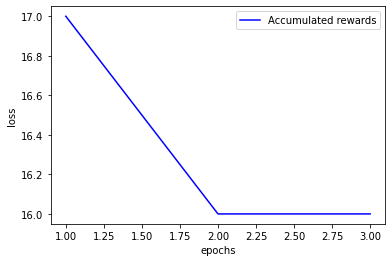

  9%|▉         | 35600/384588 [13:51<2:15:54, 42.80it/s, total reward=56]


KeyboardInterrupt: 

In [6]:
simulator = Simulator(model=model,
                     env=env,
                     train_every=int(128),
                     throttle=int(1e2),
                     memory_capacity=int(128),
                     plot_every=int(1e4))
simulator.run()